In [5]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

In [3]:
transform = transforms.ToTensor()

trainset = datasets.FashionMNIST('Fashion_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('Fashion_MNIST_data/', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100.0%

Extracting Fashion_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz


111.0%

Extracting Fashion_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz


100.0%

Extracting Fashion_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


159.1%

Extracting Fashion_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [37]:
class Network:
    def __init__(self):
        self.model = nn.Sequential(nn.Linear(784, 256),
                                   nn.ReLU(),
                                   nn.Linear(256, 64),
                                   nn.ReLU(),
                                   nn.Linear(64, 10),
                                   nn.LogSoftmax(dim=1))
        self.criterion = nn.NLLLoss()
        self.optim = optim.SGD(self.model.parameters(), lr=0.01)
        
    def train(self, trainloader, epochs=5):
        print('begin to train:')
        for e in range(epochs):
            running_loss = self.train_epoch(trainloader)
            print(f"epoch {e}  loss: {running_loss/len(trainloader)}")
                
    def train_epoch(self, trainloader):
        running_loss = 0
        for images, labels in trainloader:
            images = images.view(images.shape[0], -1)
            
            output = self.model.forward(images)
            # 计算loss
            loss = self.criterion(output, labels)
            # 反向传播，计算梯度
            self.optim.zero_grad()   # 这句要放前面
            loss.backward()
            # 更新权重
            self.optim.step()
            
            running_loss += loss.item()
        
        return running_loss
                
    def predict(self, image):
        image = image.view(1, -1)
        with torch.no_grad():
            logits = self.model.forward(image)
            
        ps = F.softmax(logits)
        return ps

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

plt.tight_layout()

begin to train:
epoch 0  loss: 1.425260068892416
epoch 1  loss: 0.7322307324040928
epoch 2  loss: 0.6066427004616907
epoch 3  loss: 0.5389744339784833
epoch 4  loss: 0.5030516723452855
epoch 5  loss: 0.47891243850625653
epoch 6  loss: 0.46328183476414
epoch 7  loss: 0.4512129529103287
CPU times: user 2min 39s, sys: 23.6 s, total: 3min 3s
Wall time: 1min 55s
tensor(9)
tensor(2)
tensor(1)
tensor(1)
tensor(6)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


tensor(1)
tensor(4)
tensor(6)


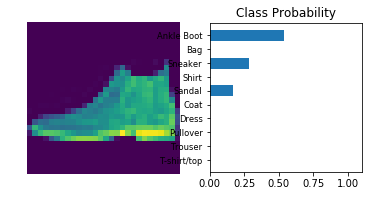

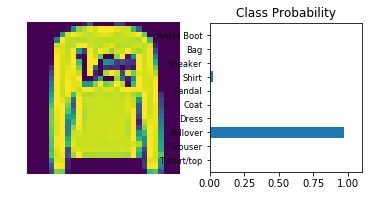

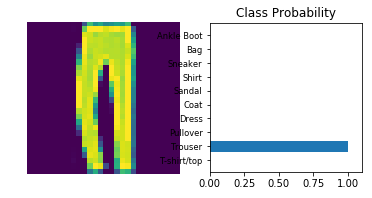

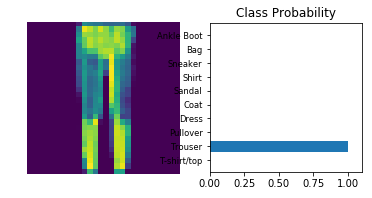

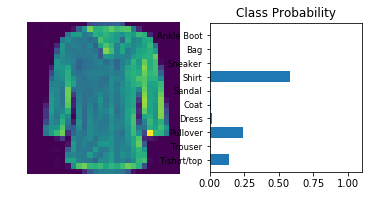

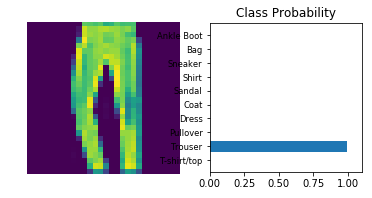

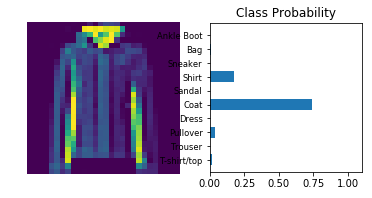

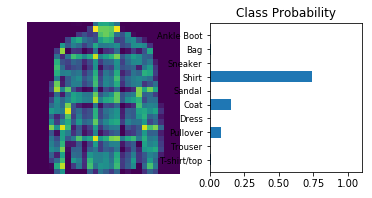

In [38]:
model = Network()
%time model.train(trainloader, epochs=8)
images, labels = next(iter(testloader))
for i in range(8):
    ps = model.predict(images[i])
    print(labels[i])
    view_classify(images[i].view(1, 28, 28), ps, version='Fashion')